<h1 style="font-family:Times New Roman;"> <center><b>Exploratory Data Analysis with ML on Student's Adaptability Level in Online Education</b></center> </h1>
<p><center style="color:black; font-family : Times New Roman">by O. Midiyanto</center></p>


<h1> <b>|</b> About Dataset</h1>

> <h4>Based on the original authors, the data gathered here comprises the personal details of students across three distinct educational levels, namely School, College, and University. <br><br>
by conducting both online and physical surveys. The surveys form consists of an individual’s socio-demographic factors.

<br><br>
    <mark>13 features</mark> and <mark>1 target column</mark> in the dataset, below is <u>description of features</u>:

*  (1) <b>Gender</b>: Gender type of student
    
    
*  (2) <b>Age</b>: Age range of the student
    
    
*  (3) <b>Education Level</b>: Education institution level
    
    
*  (4) <b>Institution Type</b>: Education institution type
    
    
*  (5) <b>IT Student</b>: Studying as IT student or not
    
    
*  (6) <b>Location</b>: whether student is located in town or not
    
    
*  (7) <b>Load-shedding</b>: Level of load shedding
    
    
*  (8) <b>Financial Condition</b>: Financial condition of family
    
    
*  (9) <b>Internet Type</b>: Internet type used mostly in device
    
    
*  (10) <b>Network Type</b>: Network connectivity type
    
    
*  (11) <b>Class Duration</b>: Daily class duration
    
    
*  (12) <b>Self LMS</b>: Institution’s own LMS availability
    
    
*  (13) <b>Device</b>: Device used mostly in class
    
    
<br> And our <u>target column</u>: 
    
    
*  (14) <b>Adaptability Level</b>: Adaptability level of the student
    
</h4>

 

<b>Import Libraries & Requirements</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
color_scheme = px.colors.qualitative.Pastel
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
#This section code is to vizualization plot
'''
Define bar plot using Plotly
'''
def p_bar_plot(x, y, x_axis_title, y_axis_title, title):
    fig = px.bar(x = x, y = y, color = x, text = y, color_discrete_sequence = color_scheme, template = 'simple_white')
    fig.update_layout(xaxis_title = x_axis_title, yaxis_title= y_axis_title, title = title, font = dict(size=17,family="Franklin Gothic"))
    fig.update_traces(width=0.5)
    fig.show()

'''
Define pie plot using Plotly
'''
def p_pie_plot(series, title):
    fig = px.pie(values=series.values, names=series.index, color_discrete_sequence=color_scheme,title= title, template='simple_white')
    fig.update_traces(textinfo='label+percent+value', textfont_size=20,
                  marker=dict(line=dict(color='#100000', width=0.2)))
    fig.data[0].marker.line.width = 1
    fig.update_layout(font=dict(size=20,family="Franklin Gothic"))
    fig.show()

<b>Read the .csv data</b>

In [16]:
df=pd.read_csv('students_adaptability_level_online_education.csv')
print("Shape of the Dataframe: ",df.shape)
df.head()

Shape of the Dataframe:  (1205, 14)


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


As you can see in the above, the dataframe has 14 columns, and 1205 rows (number of data)

In [17]:
#check the data types of the data features
print(df.info(),"\n\n")
#summary statistics of the data
print(df.describe().T,"\n\n")
#Checking for Null values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB
None 


                    count unique             top  freq
Gen

Base on the above checking we can see that all the data features/columns is object type, which mean all the data features are composed of <b>Categorical data</b>, so base on this information, we know already that the closest way to do prediction with this data is by <b>Multiclass Classification</b> method. 

We can infer that the dataset does not contain any Null values, which simplifies and improves the efficiency of the analysis process. Additionally, it is evident from this observation that the dataframe is complete without any missing values.

---------------------------------------------------------------------------------------------------------------------------------------------------

<div style="text-align: center;">
  <h1><b>ANALYSIS QUESTION</b></h1>
</div>

<b>1. How are the students adapting to the online learning system?</b>

In [5]:
p_pie_plot(df['Adaptivity Level'].value_counts(), 'Adaptivity Levels Among Students')

According to the data, a mere <b>8.3%</b> of students demonstrated a <b>high</b> level of adaptation to online education, while more than half, specifically <b>51.9%</b>, displayed a <b>moderate</b> level of adaptability. The remaining <b>39.8%</b> of students were categorized as having a <b>low</b> level of adaptability.

<b>2. What are the relationships between the independent variables measured and adaptivity level?</b>

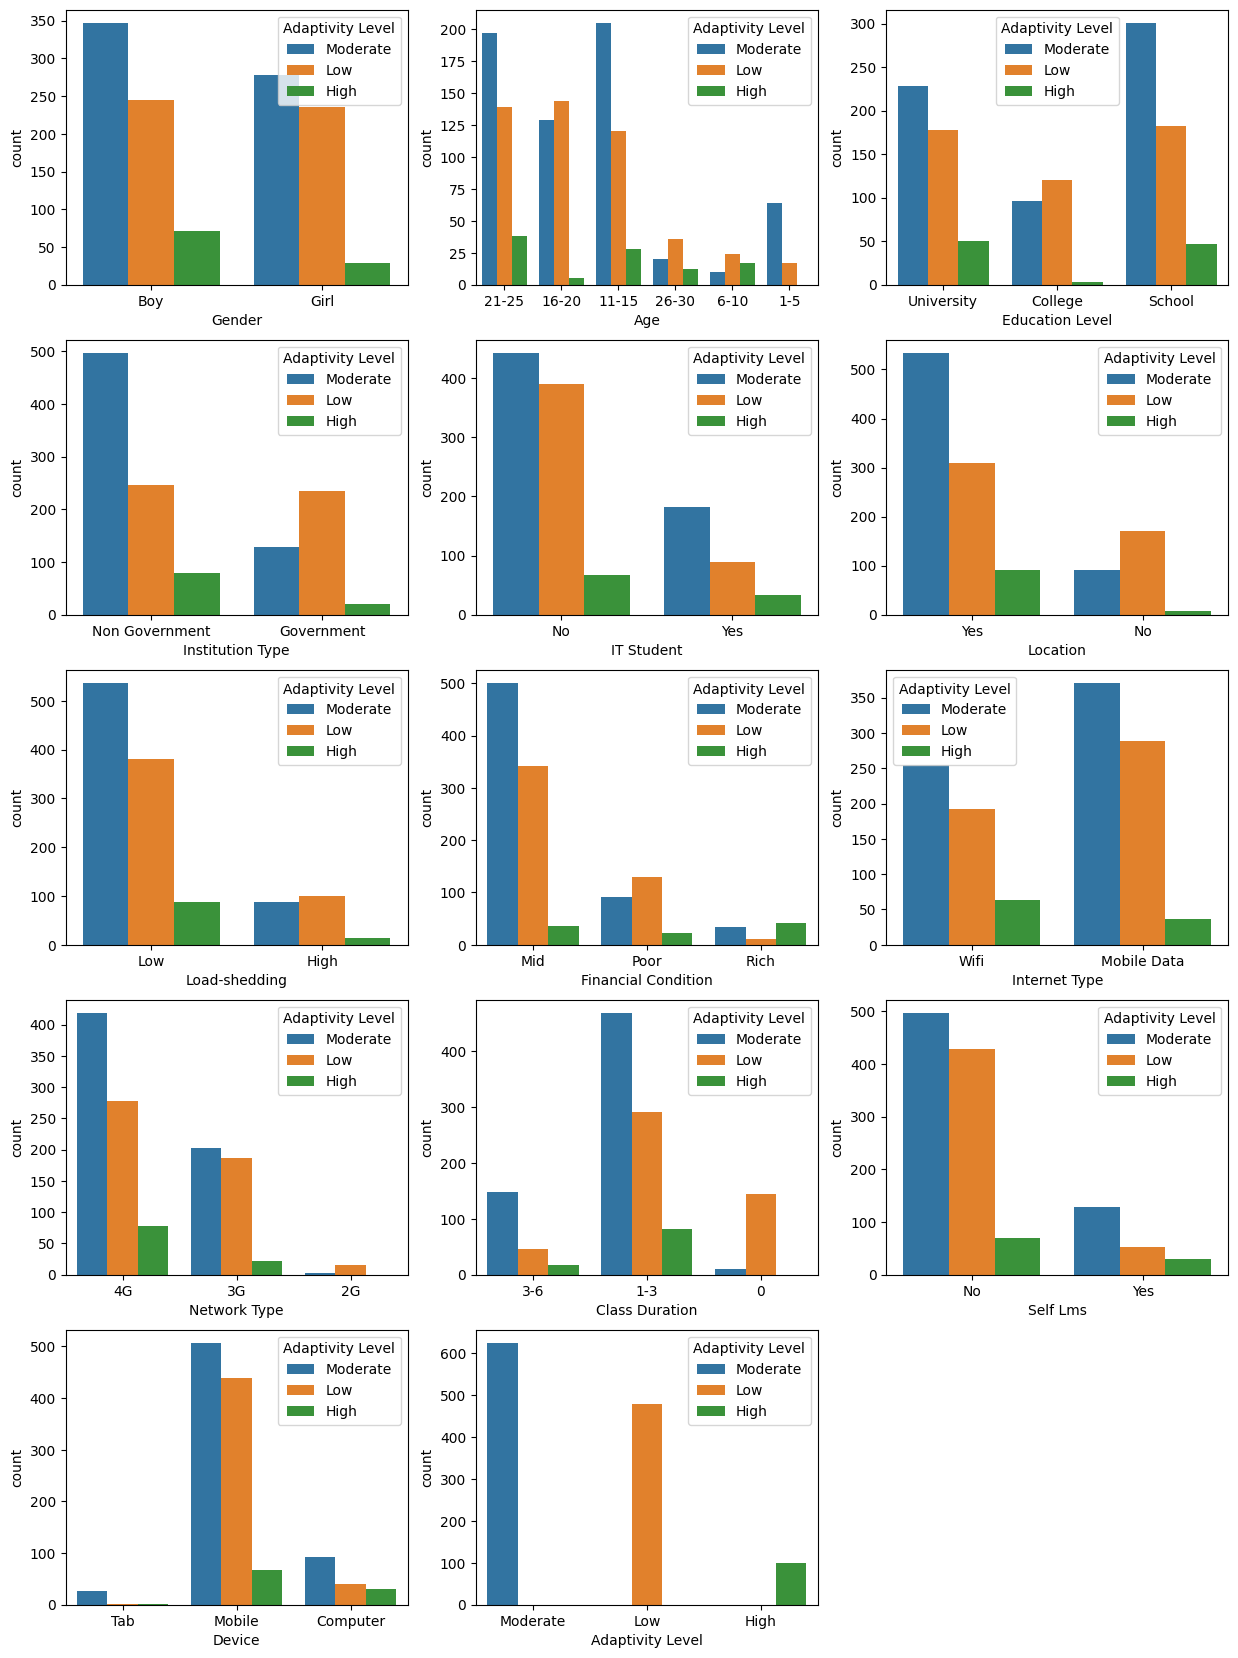

In [6]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df)
    i +=1

The most important things to point out in this visualizations:

* Age Range: The adaptivity levels vary significantly across different age ranges. Notably, respondents between the ages of 1-5 showed very low adaptivity. Higher adaptivity was primarily observed among 11-15 year-olds and 21-25 year-olds, typically in junior high school and tertiary institutions.

* Location: The variable indicating whether students resided in urban or rural areas revealed that urban students exhibited better adaptivity compared to their rural counterparts. This difference may be attributed to factors such as access to facilities, basic amenities, and better internet connectivity in urban areas.

* Load Shedding: This variable measures the level of electricity load shedding, which is inversely proportional to the availability of power supply. Students experiencing frequent load shedding tended to exhibit lower levels of adaptivity compared to those with less load shedding and consequently better electricity supply.

* Internet Type: Students using WiFi networks displayed higher frequencies of high adaptivity compared to those relying on mobile networks. This finding suggests that the availability of high-speed internet connectivity associated with WiFi networks may have contributed to better concentration during online classes.

* Self LMS: This variable indicates the availability of the educational institution's Learning Management System (LMS). Although a smaller portion of the sample had access to LMS, they exhibited higher rates of high adaptivity to online education. Interestingly, the proportion of students with low adaptivity was also relatively small compared to those who did not use the LMS.

<b>3. What factors are most important in predicting the adaptivity levels of the students?</b>

Using machine learning methods,we'd predict what features are most important in forecasting adaptivity level among the students.

Since data are composed of categorical values, use LabelEncoder() to encode into numeric values so that our model can understand it easily

In [7]:
columns = ['Gender','Age','Education Level','Institution Type','IT Student','Location',
           'Load-shedding','Financial Condition','Internet Type','Network Type',
           'Class Duration','Self Lms','Device','Adaptivity Level']
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [8]:
X = df.drop(['Adaptivity Level'],axis = 1)
y = df['Adaptivity Level']
X_train, X_test, y_train, y_test=train_test_split(X,y ,test_size=0.33,random_state=116)

Random Forest Accuracy: 89.45%
KNN Accuracy: 80.40%
SVC Accuracy: 72.86%
Logistic Regression Accuracy: 65.83%
XGBClassifier Accuracy: 89.70%
CatBoostClassifier Accuracy: 90.45%


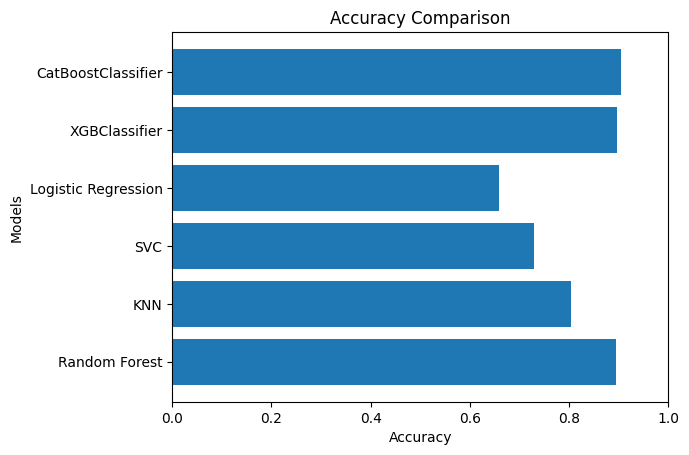

In [9]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(), XGBClassifier(), CatBoostClassifier(verbose=False)]
model_names = ['Random Forest', 'KNN', 'SVC', 'Logistic Regression', 'XGBClassifier', 'CatBoostClassifier']
accuracies = []

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(model_name, 'Accuracy: {:.2f}%'.format(accuracy*100))
    
plt.barh(model_names, accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1
plt.show()


In this step we can make conclusion that the best model base on its accuracy is the <b>CatBoostClassifier</b> with the highest accuracy percentage.

In [10]:
BestModel= CatBoostClassifier(verbose=False)
BestModel.fit(X_train, y_train)
y_pred = BestModel.predict(X_test)
report = classification_report(y_test,y_pred, zero_division=1, output_dict=True)
# Convert classification report to DataFrame table
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,1.000000,0.533333,0.695652,30.000000
1,0.867052,0.961538,0.911854,156.000000
2,0.928230,0.915094,0.921615,212.000000
accuracy,0.904523,0.904523,0.904523,0.904523
macro avg,0.931761,0.803322,0.843040,398.000000
weighted avg,0.909660,0.904523,0.900757,398.000000


<b>After going through all the necessary validations, we can now confidently conclude that our model is sufficiently accurate in predicting the answer to our question.</b>

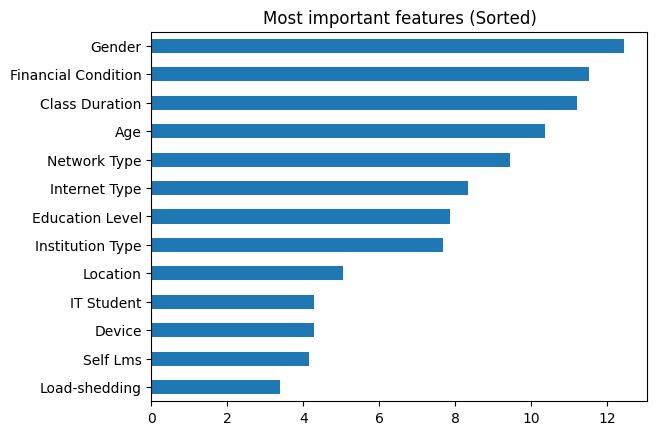

In [11]:
feature_importances=BestModel.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Variable importance':feature_importances})
feature_importances_df.sort_values('Variable importance')
feat_importances = pd.Series(BestModel.feature_importances_, index=X.columns)

feat_importances.nlargest(13).plot(kind='barh')
plt.title("Most important features (Sorted)")
plt.gca().invert_yaxis() # Invert the y-axis to show largest at the top
plt.show()

In conclusion, we can see that the top 5 features that important for this model on predicting the student adaptability in online education are:
1. Gender
2. Financial Condition
3. Class Duration
4. Age
5. Network Type

This analysis has the potential to benefit decision-makers in the education sector by providing them with a comprehensive understanding of the current state of online education and students' adaptability. Based on the insights obtained from this analysis, we can propose the following strategic recommendations:

* To optimize adaptability, educators should ensure that their classes are scheduled for 1-3 hours, as class duration has a significant impact. Additionally, incorporating hands-on activities, short breaks, and pop quizzes, especially after one hour of didactic teaching, can help maintain focus and enhance adaptability.

* Even in online teaching, it is important to employ teaching methods that are suitable for the age group of the students.

* Government institutions can play a supportive role by improving internet connectivity options, particularly for students in government schools.

* Parents are encouraged to provide appropriate support to their children within their financial means. This support may include setting up household WiFi networks, supervising computer systems, and offering moral support as their children adjust to this new online learning environment.

Thank you for taking the time to read.